# 

In [1]:
import pandas as pd
from utils import (
    compare_test_with_predicition,
    fit_model,
    get_parkings_df, 
    get_parkings_in_zone,
    get_hourly_parkings,
    get_pipeline,
    get_weather_data,
    add_seasonability_columns,
    predict,
    plot_predictions,
    SEASONABILITY_COLUMNS,
    RAIN,
    TEMPERATURE,
    YEAR,
    ONEHOT_SCALER_COLUMNS
)

# Load and prepare data

In [2]:
df_parkings = get_parkings_df("../data/parkings_small.csv")
parkings_in_zone = get_parkings_in_zone(df_parkings, 1)
print(f"Found {len(parkings_in_zone)} parkings in zone")
hourly_parkings = get_hourly_parkings(parkings_in_zone)
# clean data by removing early data days without cars
hourly_parkings = hourly_parkings[hourly_parkings["ds"]> "2024-5-20"]
df_rain, df_temperature = get_weather_data()
hourly_parking = pd.merge(hourly_parkings, df_rain, on="ds", how='left')
hourly_parking = pd.merge(hourly_parking, df_temperature, on="ds", how='left')
hourly_parking.head()
df = hourly_parking.copy()
df.set_index("ds", inplace=True)
df_rain_train = pd.merge(hourly_parkings, df_rain, on="ds", how='left')
df_rain_train.set_index("ds", inplace=True)

df_temperature_train = pd.merge(hourly_parkings, df_temperature, on="ds", how='left')
df_temperature_train.set_index("ds", inplace=True)
df.head()
df_rain_train.head()

Found 718955 parkings in zone


,num_parkings,rain
ds,,
2024-05-20 01:00:00,1,False
2024-05-20 02:00:00,1,False
2024-05-20 03:00:00,1,False
2024-05-20 04:00:00,3,False
2024-05-20 05:00:00,51,False


#

In [3]:
df = add_seasonability_columns(df)
pipeline = get_pipeline()
X_test, y_test = fit_model(pipeline, df, SEASONABILITY_COLUMNS)
compare_test_with_predicition(pipeline, X_test, y_test)

ValueError: A given column is not a column of the dataframe

mean squared error: 5602.824076184092
mean absolute percentage error 1205852208782259.5
                     num_parkings   rain  year  month  dayofweek  hour
ds                                                                    
2024-05-20 01:00:00             1  False  2024      5          0     1
2024-05-20 02:00:00             1  False  2024      5          0     2
2024-05-20 03:00:00             1  False  2024      5          0     3
2024-05-20 04:00:00             3  False  2024      5          0     4
2024-05-20 05:00:00            51  False  2024      5          0     5


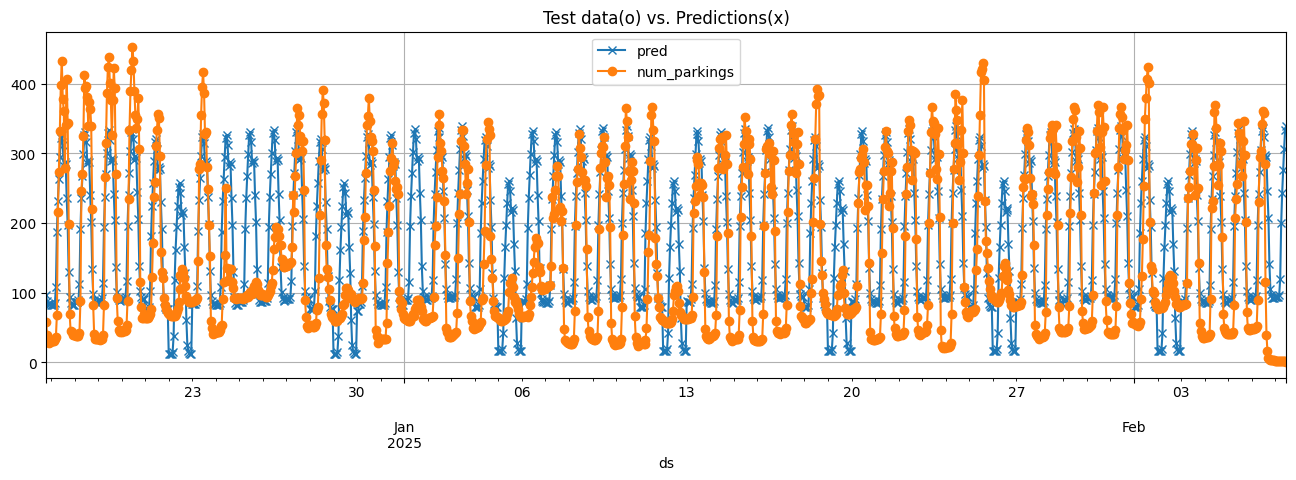

In [ ]:
df_rain_train = add_seasonability_columns(df_rain_train)
pipeline_rain = get_pipeline(standard_columns=[YEAR, RAIN])
X_test, y_test = fit_model(pipeline_rain, df_rain_train, SEASONABILITY_COLUMNS+[RAIN])
compare_test_with_predicition(pipeline_rain, X_test, y_test)
print(df_rain_train.head())
# df_temperature_train = add_seasonability_columns(df_temperature_train)
# pipeline_temperature = get_pipeline(standard_columns=[TEMPERATURE, YEAR])
# X_test, y_test = fit_model(pipeline_temperature, df_temperature_train, SEASONABILITY_COLUMNS+[TEMPERATURE])
# compare_test_with_predicition(pipeline_temperature, X_test, y_test)

# Predictions

Baseline prediction of cars 125807.15579532883


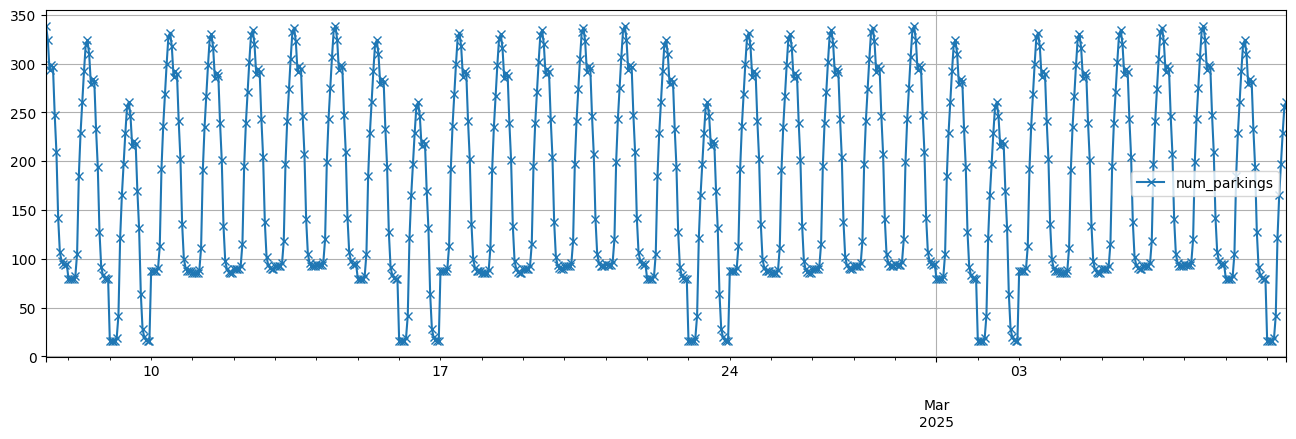

In [ ]:
date_range = pd.date_range(start="2025-02-07 11:00:00", end="2025-03-09 11:00:00", freq="h")
predictions = predict(pipeline, date_range)
print(f"Baseline prediction of cars {predictions["num_parkings"].sum()}")
plot_predictions(predictions)

# Correlation between rain and dry weather


In [ ]:

predictions = predict(pipeline_rain, date_range, rain=True)
print(f"Prediction in parkings during rain: {predictions["num_parkings"].sum()}")
predictions = predict(pipeline_rain, date_range, rain=False)
print(f"Prediction in parkings during dry weather: {predictions["num_parkings"].sum()}")


Prediction in parkings during rain: 118484.51341691663
Prediction in parkings during dry weather: 125859.55000235494
